In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

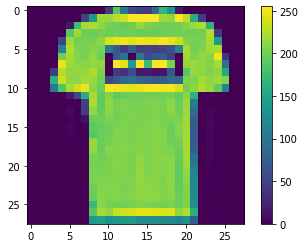

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

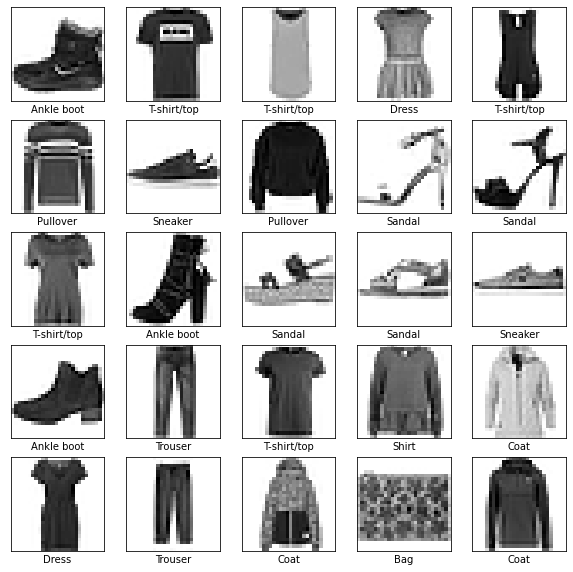

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 3s 6ms/step - loss: 1.1287 - accuracy: 0.6140 - val_loss: 0.5211 - val_accuracy: 0.8280
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.8201 - val_loss: 0.4497 - val_accuracy: 0.8443
Epoch 3/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8393 - val_loss: 0.4153 - val_accuracy: 0.8553
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8552 - val_loss: 0.3882 - val_accuracy: 0.8643
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 0.3902 - accuracy: 0.8630 - val_loss: 0.3747 - val_accuracy: 0.8667
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8673 - val_loss: 0.3608 - val_accuracy: 0.8723
Epoch 7/10
112/112 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8711 - val_loss: 0.3549 - val_accuracy: 0.8750
Epoch 

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3568 - accuracy: 0.8748

Test accuracy: 0.8748000264167786


In [16]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

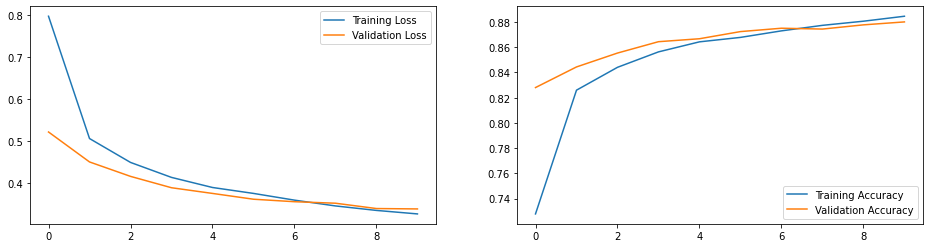

In [18]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [19]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8748
0.3567633330821991
0.8748000264167786


In [20]:
predictions = model.predict(test_images)

In [21]:
print(predictions)

[[ -5.747296    -8.711601    -5.0833764  ...   3.551509     0.20082682
    6.340043  ]
 [  2.0059087   -7.681984    10.389399   ... -13.198728    -1.5851873
  -12.609895  ]
 [  2.623386    12.8888      -1.4334787  ...  -7.693182    -4.284135
   -6.628595  ]
 ...
 [  0.53923213  -9.160225    -0.95930344 ...  -3.9365735    5.380637
   -6.4360843 ]
 [ -1.5209084    9.751947    -1.9314697  ...  -4.9306965   -4.9096127
   -3.6770937 ]
 [ -3.538242    -5.3816004   -2.0700762  ...   1.5001843   -0.09842128
   -1.7407433 ]]


In [22]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [23]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5170,    4,   58,   85,   14,    2,  345,    0,   40,    0],
       [  29, 5535,    6,   85,    9,    1,   12,    0,    2,    0],
       [  93,    3, 4790,   36,  468,    1,  299,    0,   20,    0],
       [ 247,   36,   44, 5012,  223,    0,  111,    0,   14,    1],
       [  18,    3,  466,  122, 4779,    0,  289,    0,   19,    1],
       [   3,    0,    0,    1,    0, 5526,    1,  107,   13,   49],
       [ 871,    7,  509,   82,  415,    0, 3769,    0,   49,    0],
       [   0,    0,    0,    0,    0,  126,    1, 5300,    9,  252],
       [  20,    5,   28,   12,   23,    8,   35,   13, 5566,    3],
       [   1,    1,    0,    0,    0,   28,    0,  113,    3, 5559]],
      dtype=int32)>

In [24]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

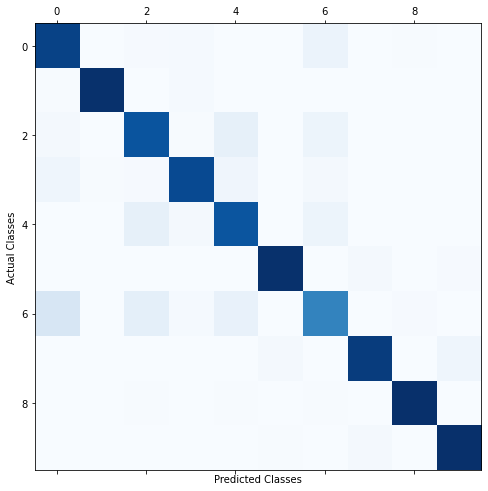

In [25]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()